# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [36]:
# Fetch current BTC price
def get_latest_BTC_crypto_price():    
    response = requests.get(btc_url)
    response_json = response.json()

    return float(response_json['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
def get_latest_ETH_crypto_price():    
    response = requests.get(eth_url)
    response_json = response.json()

    return float(response_json['data']['1027']['quotes']['USD']['price'])


# Compute current value of my crpto
my_btc_value = get_latest_BTC_crypto_price() * my_btc 
my_eth_value = get_latest_ETH_crypto_price() * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45272.40
The current value of your 5.3 ETH is $13474.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-09", tz = "America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head(10)

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.05  3418086  423.18   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.05
Current SPY closing price: $421.62


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21081.00
The current value of your 200 AGG shares is $23010.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio = {"Amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
print(total_portfolio)
# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio, index = ["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

{'Amount': [58690.032, 44091.0]}


,Amount
Crypto,58690.032
Shares,44091.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

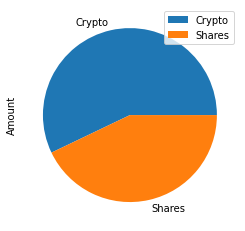

In [12]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots = True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()
#total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have more than 3 times your monthly income in your emergency fund.")
elif total_savings < emergency_fund:
    print(f"You have a little more saving to do.  You are ${emergency_fund - total_savings} away from your financial goal.")
else:
    print("You are right at your goal, way to go!")


Congrats! You have more than 3 times your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010251,0.998170,1.002814,0.991322,0.997947,1.001121,0.997104,1.011503,1.008454,0.994321,...,0.998679,1.023888,1.004677,1.001465,1.008515,0.996752,0.995314,1.004799,1.005458,0.998486
2,1.020659,0.996110,1.000894,1.006364,0.993592,1.004635,1.002309,1.019499,1.011013,0.987481,...,0.981749,1.022324,1.009602,0.999662,1.012739,1.006180,0.998051,1.000907,1.015579,0.996453
3,1.017758,0.996683,0.999303,1.016647,0.995949,1.007004,0.990655,1.013893,1.003066,0.991803,...,0.985461,1.025783,1.014760,0.987419,1.017883,1.006719,1.006072,1.004830,1.014671,0.989039
4,1.011573,0.987581,0.992639,1.010938,0.997390,0.995693,0.999513,1.020407,1.004314,1.000505,...,0.988050,1.015758,1.020065,0.980776,1.015551,1.004866,1.009828,0.987033,1.011916,0.985753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.550319,13.023313,3.652600,18.509989,18.958656,49.987039,31.825669,13.168635,14.766150,29.711661,...,36.842811,57.973127,14.410122,12.372815,12.183969,7.808655,51.256392,9.303343,20.419361,9.911171
7557,20.295414,13.039822,3.662216,18.680749,19.298551,50.145850,31.612055,13.323375,14.517913,30.549774,...,37.329083,58.106564,14.213643,12.436441,12.069248,7.875282,52.075743,9.425836,20.519595,9.890821
7558,20.373654,12.946600,3.611485,18.982193,19.288506,49.985660,31.294926,13.312783,14.434088,30.491578,...,37.118474,58.706822,14.033033,12.357204,11.876577,7.875563,52.005123,9.445498,20.518296,9.882084
7559,20.410862,12.877442,3.610180,18.836920,19.183037,50.471678,31.166789,13.252969,14.531205,30.643459,...,36.596453,58.674795,14.028241,12.437662,11.861897,7.874175,51.435898,9.522449,20.635788,9.751613


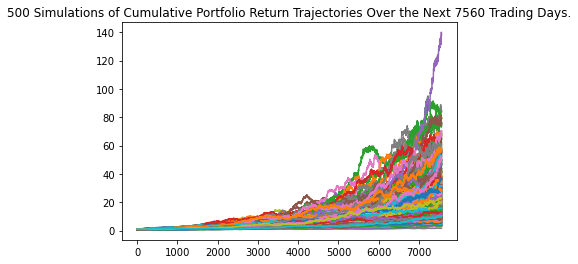

In [19]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

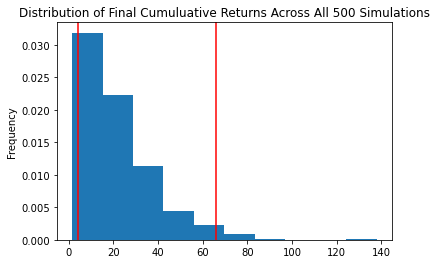

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(thirty_tbl)

count           500.000000
mean             22.259153
std              16.364525
min               1.625214
25%              11.020731
50%              16.904202
75%              29.392406
max             137.787318
95% CI Lower      4.287903
95% CI Upper     66.112117
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_tbl[8]*initial_investment,2)
ci_upper = round(thirty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85758.06 and $1322242.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_tbl[8]*initial_investment,2)
ci_upper = round(thirty_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128637.09 and $1983363.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

MC_5_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998560,1.002642,1.013532,1.009856,1.001472,0.999348,0.985522,0.990005,1.004412,0.991802,...,0.994237,0.997441,1.003948,1.003225,0.998001,1.004894,1.015379,1.009601,1.006525,1.004817
2,0.989455,1.010864,0.997686,1.008438,1.003340,1.001702,0.985613,0.990782,0.993440,0.999320,...,1.005967,0.991229,0.994562,1.003330,1.009809,1.003637,1.028421,1.007856,0.999411,0.982846
3,0.993884,1.002766,1.012607,1.017955,1.011258,1.006229,0.981600,0.991550,0.988112,1.007478,...,1.006773,0.978033,0.984705,0.997982,1.015727,1.009924,1.030021,1.016928,0.990152,0.985694
4,0.990811,1.001576,1.024186,1.016641,1.011428,1.000338,0.980040,0.999235,0.988946,1.011946,...,1.010277,0.978932,0.969004,0.993634,1.010906,1.003242,1.030015,1.023663,0.992939,0.995172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.473363,2.392406,1.871555,1.068419,1.235938,2.626798,3.080324,1.672375,2.166930,2.087777,...,0.891176,2.497237,2.004322,2.102995,1.455060,1.669395,1.893618,1.403559,1.345340,1.773638
1257,1.477363,2.393115,1.859439,1.057229,1.239912,2.630398,3.112308,1.690407,2.169424,2.092789,...,0.881833,2.486831,1.982863,2.112149,1.437214,1.650404,1.904522,1.401881,1.371739,1.776879
1258,1.462667,2.399609,1.849354,1.057949,1.228017,2.649931,3.134491,1.699982,2.193427,2.082062,...,0.891518,2.454687,1.959241,2.121222,1.427252,1.650544,1.914184,1.382690,1.387877,1.771299
1259,1.446692,2.402421,1.839487,1.063845,1.227018,2.618874,3.131062,1.688357,2.191804,2.072881,...,0.890262,2.459592,1.973550,2.094301,1.430746,1.637614,1.910397,1.389212,1.384076,1.788815


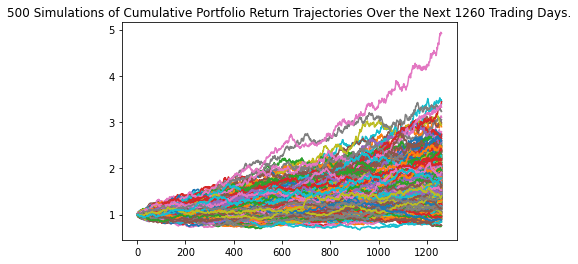

In [26]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()

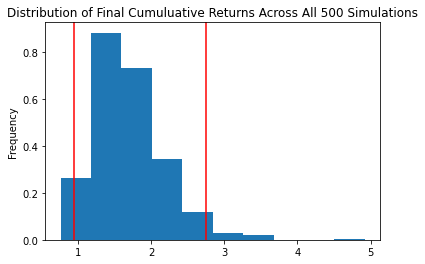

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              1.692085
std               0.487502
min               0.761700
25%               1.372246
50%               1.619719
75%               1.940767
max               4.922933
95% CI Lower      0.948233
95% CI Upper      2.746182
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_tbl[8]*initial_investment,2)
ci_upper_five = round(five_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56893.96 and $164770.91


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

MC_10_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005908,1.010797,1.003214,0.991608,1.017495,1.010517,0.993653,0.995443,1.004897,1.002317,...,0.993326,1.006299,0.996988,1.006373,0.997430,0.995885,1.006972,1.007653,1.002421,0.989448
2,1.005341,1.002489,0.997931,0.993991,1.023143,1.005412,0.983220,0.990790,0.997840,1.006200,...,0.994515,0.990058,0.991978,0.998397,0.995408,0.990742,1.019437,0.992188,1.000232,0.986417
3,1.004258,0.981014,0.987979,0.988062,1.028275,1.006668,0.986597,0.972308,0.995939,1.013912,...,0.997863,0.969352,0.988895,0.993171,0.993851,0.974531,1.016997,0.979442,1.013856,0.981610
4,1.015533,0.980107,0.983106,0.987385,1.030655,1.025321,1.000582,0.978389,1.014002,1.021524,...,0.999906,0.982628,0.985616,0.994043,1.001238,0.974872,1.003262,0.989136,1.011270,0.988977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.487462,2.030483,4.711649,2.103481,6.155271,2.077777,0.985452,1.721473,4.669869,1.446130,...,2.516452,2.813444,4.073202,2.767181,3.517724,2.557876,1.414526,3.376453,2.125511,2.411274
2517,2.478922,2.026863,4.714702,2.087645,6.257200,2.063059,0.981128,1.727274,4.667919,1.457655,...,2.497885,2.784008,4.007994,2.792676,3.553900,2.530611,1.412503,3.356973,2.123929,2.399957
2518,2.451594,2.038149,4.784261,2.086321,6.222063,2.065275,0.984078,1.718828,4.660863,1.450607,...,2.507913,2.769145,4.046559,2.816887,3.579157,2.532448,1.421263,3.287286,2.143155,2.446242
2519,2.441212,2.036298,4.848455,2.087929,6.225207,2.063927,0.989801,1.697296,4.664126,1.458680,...,2.487115,2.776829,4.035067,2.828924,3.595563,2.516674,1.426630,3.274693,2.150971,2.470843


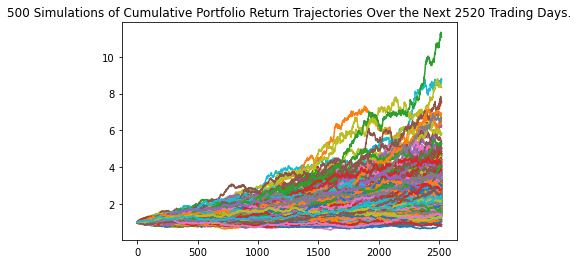

In [32]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

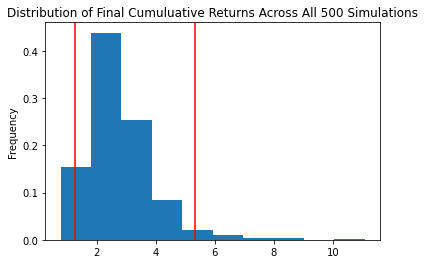

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              2.761036
std               1.170750
min               0.777930
25%               1.980558
50%               2.529831
75%               3.264668
max              11.074763
95% CI Lower      1.280301
95% CI Upper      5.338759
Name: 2520, dtype: float64


In [35]:
# Set initial investment
intitial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_tbl[8]*initial_investment,2)
ci_upper_ten = round(ten_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76818.07 and $320325.56
